<a href="https://colab.research.google.com/github/Chenanism777/UROP_CV_HELMETDETECTION/blob/main/helmet140921.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!ls
!rm -fr darknet
!git clone https://github.com/AlexeyAB/darknet/

drive  sample_data
Cloning into 'darknet'...
remote: Enumerating objects: 15308, done.
remote: Total 15308 (delta 0), reused 0 (delta 0), pack-reused 15308
Receiving objects: 100% (15308/15308), 13.70 MiB | 14.38 MiB/s, done.
Resolving deltas: 100% (10400/10400), done.


In [5]:
cp drive/'My Drive'/helmet/data_for_colab.zip /content/darknet

In [6]:
cd darknet

/content/darknet


In [7]:
ls

3rdparty/               darknet_video.py        net_cam_v3.sh*
build/                  data/                   net_cam_v4.sh*
build.ps1*              data_for_colab.zip      README.md
cfg/                    image_yolov3.sh*        results/
cmake/                  image_yolov4.sh*        scripts/
CMakeLists.txt          include/                src/
DarknetConfig.cmake.in  json_mjpeg_streams.sh*  vcpkg.json
darknet_images.py       LICENSE                 video_yolov3.sh*
darknet.py              Makefile                video_yolov4.sh*


In [8]:
!unzip data_for_colab

Archive:  data_for_colab.zip
   creating: data_for_colab/
  inflating: data_for_colab/yolov3-tiny-obj.cfg  
  inflating: data_for_colab/obj.names  
  inflating: data_for_colab/obj.data  
  inflating: data_for_colab/test.txt  
  inflating: data_for_colab/train.txt  
  inflating: data_for_colab/yolov3-tiny.conv.15  
   creating: data_for_colab/data/
  inflating: data_for_colab/data/hard_hat_workers0.txt  
  inflating: data_for_colab/data/hard_hat_workers1.txt  
  inflating: data_for_colab/data/hard_hat_workers2.txt  
  inflating: data_for_colab/data/hard_hat_workers3.txt  
  inflating: data_for_colab/data/hard_hat_workers4.txt  
  inflating: data_for_colab/data/hard_hat_workers5.txt  
  inflating: data_for_colab/data/hard_hat_workers6.txt  
  inflating: data_for_colab/data/hard_hat_workers7.txt  
  inflating: data_for_colab/data/hard_hat_workers8.txt  
  inflating: data_for_colab/data/hard_hat_workers9.txt  
  inflating: data_for_colab/data/hard_hat_workers10.txt  
  inflating: data_for_

In [9]:
#upload train test.txt files
from google.colab import files
uploaded = files.upload() 
for name, data in uploaded.items():
  with open(name, 'wb') as f:
    f.write(data)
    print ('saved file', name)

Saving test.txt to test.txt
Saving train.txt to train.txt
saved file test.txt
saved file train.txt


In [10]:
!apt-get update
!apt-get upgrade

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:13 http://security.ubuntu.com/ubuntu bionic-securi

In [11]:
!apt-get install build-essential
!apt-get install cmake git libgtk2.0-dev pkg-config libavcodec-dev libavformat-dev libswscale-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
The following package was automatically installed and is no longer required:
  r-cran-markdown
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
pkg-config is already the newest version (0.29.1-0ubuntu2).
cmake is already the newest version (3.10.2-1ubuntu2.18.04.2).
git is already the newest version (1:2.17.1-1ubuntu0.9).
libavcodec-dev is already the newest version (7:3.4.8-0ubuntu0.2).
libavcodec-dev set to manually installed.
libavformat-dev is already the newest version (7:3.4.8-0ubuntu0.2).
libavformat-dev set to manually installed.
libswscale-dev is already the newest version (7:3.4.8-0ubuntu0.2).
libswscale-dev set to manually installed.
The following package was automatically insta

In [12]:
!apt-get install libavcodec-dev libavformat-dev libswscale-d

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libswscale-d


In [13]:
!apt-get -y install cmake
!which cmake

!cmake --version

Reading package lists... Done
Building dependency tree       
Reading state information... Done
cmake is already the newest version (3.10.2-1ubuntu2.18.04.2).
The following package was automatically installed and is no longer required:
  r-cran-markdown
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
/usr/local/bin/cmake
cmake version 3.12.0

CMake suite maintained and supported by Kitware (kitware.com/cmake).


In [14]:
!apt-get install libopencv-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libopencv-dev is already the newest version (3.2.0+dfsg-4ubuntu0.1).
The following package was automatically installed and is no longer required:
  r-cran-markdown
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.


In [15]:
!apt-get install vim

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  r-cran-markdown
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libgpm2 vim-common vim-runtime xxd
Suggested packages:
  gpm ctags vim-doc vim-scripts
The following NEW packages will be installed:
  libgpm2 vim vim-common vim-runtime xxd
0 upgraded, 5 newly installed, 0 to remove and 5 not upgraded.
Need to get 6,722 kB of archives.
After this operation, 32.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 xxd amd64 2:8.0.1453-1ubuntu1.4 [49.3 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 vim-common all 2:8.0.1453-1ubuntu1.4 [70.4 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgpm2 amd64 1.20.7-5 [15.1 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 vim-r

In [16]:
ls

3rdparty/               data/                   net_cam_v4.sh*
build/                  data_for_colab/         README.md
build.ps1*              data_for_colab.zip      results/
cfg/                    image_yolov3.sh*        scripts/
cmake/                  image_yolov4.sh*        src/
CMakeLists.txt          include/                test.txt
DarknetConfig.cmake.in  json_mjpeg_streams.sh*  train.txt
darknet_images.py       LICENSE                 vcpkg.json
darknet.py              Makefile                video_yolov3.sh*
darknet_video.py        net_cam_v3.sh*          video_yolov4.sh*


In [17]:
#Now let's get some YOLOv3 weights from the official site
!ls
!wget https://pjreddie.com/media/files/yolov3.weights

3rdparty		data		       net_cam_v4.sh
build			data_for_colab	       README.md
build.ps1		data_for_colab.zip     results
cfg			image_yolov3.sh        scripts
cmake			image_yolov4.sh        src
CMakeLists.txt		include		       test.txt
DarknetConfig.cmake.in	json_mjpeg_streams.sh  train.txt
darknet_images.py	LICENSE		       vcpkg.json
darknet.py		Makefile	       video_yolov3.sh
darknet_video.py	net_cam_v3.sh	       video_yolov4.sh
--2021-09-13 15:26:11--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  22.9MB/s    in 11s     

2021-09-13 15:26:23 (21.6 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [18]:
#No here we're modifying the makefile to set OPENCV and GPU to 1
!ls
!sed -i 's/OPENCV=0/OPENCV=1/g' Makefile
!sed -i 's/GPU=0/GPU=1/g' Makefile

3rdparty		data_for_colab	       results
build			data_for_colab.zip     scripts
build.ps1		image_yolov3.sh        src
cfg			image_yolov4.sh        test.txt
cmake			include		       train.txt
CMakeLists.txt		json_mjpeg_streams.sh  vcpkg.json
DarknetConfig.cmake.in	LICENSE		       video_yolov3.sh
darknet_images.py	Makefile	       video_yolov4.sh
darknet.py		net_cam_v3.sh	       yolov3.weights
darknet_video.py	net_cam_v4.sh
data			README.md


In [19]:
!ls
%cd ../
!ls

3rdparty		data_for_colab	       results
build			data_for_colab.zip     scripts
build.ps1		image_yolov3.sh        src
cfg			image_yolov4.sh        test.txt
cmake			include		       train.txt
CMakeLists.txt		json_mjpeg_streams.sh  vcpkg.json
DarknetConfig.cmake.in	LICENSE		       video_yolov3.sh
darknet_images.py	Makefile	       video_yolov4.sh
darknet.py		net_cam_v3.sh	       yolov3.weights
darknet_video.py	net_cam_v4.sh
data			README.md
/content
darknet  drive	sample_data


In [20]:
!apt install g++-5
!apt install gcc-5

!update-alternatives --install /usr/bin/gcc gcc /usr/bin/gcc-5 10
!update-alternatives --install /usr/bin/gcc gcc /usr/bin/gcc-5 20
!update-alternatives --install /usr/bin/g++ g++ /usr/bin/g++-5 10
!update-alternatives --install /usr/bin/g++ g++ /usr/bin/g++-5 20
!update-alternatives --install /usr/bin/cc cc /usr/bin/gcc 30
!update-alternatives --set cc /usr/bin/gcc
!update-alternatives --install /usr/bin/c++ c++ /usr/bin/g++ 30
!update-alternatives --set c++ /usr/bin/g++

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  r-cran-markdown
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  cpp-5 gcc-5 gcc-5-base libasan2 libgcc-5-dev libisl15 libmpx0
  libstdc++-5-dev
Suggested packages:
  gcc-5-locales g++-5-multilib gcc-5-doc libstdc++6-5-dbg gcc-5-multilib
  libgcc1-dbg libgomp1-dbg libitm1-dbg libatomic1-dbg libasan2-dbg
  liblsan0-dbg libtsan0-dbg libubsan0-dbg libcilkrts5-dbg libmpx0-dbg
  libquadmath0-dbg libstdc++-5-doc
The following NEW packages will be installed:
  cpp-5 g++-5 gcc-5 gcc-5-base libasan2 libgcc-5-dev libisl15 libmpx0
  libstdc++-5-dev
0 upgraded, 9 newly installed, 0 to remove and 5 not upgraded.
Need to get 29.1 MB of archives.
After this operation, 100 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 gcc-5-base amd6

In [21]:
#Now, here's a bunch of code that takes the longest to execute here but
#It's about installing CUDA and using the beautiful Tesla K80 GPU, so that
#Will worth it

!apt update -qq;
!wget https://developer.nvidia.com/compute/cuda/8.0/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
!dpkg -i cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
!apt-get update -qq

#Here were are installing compilers and creating some links
!apt-get install cuda -y -qq #gcc-5 g++-5 
#!ln -s /usr/bin/gcc-5 /usr/local/cuda/bin/gcc
#!ln -s /usr/bin/g++-5 /usr/local/cuda/bin/g++
!apt update
!apt upgrade
!apt install cuda-10.2 -y

5 packages can be upgraded. Run 'apt list --upgradable' to see them.
--2021-09-13 15:26:40--  https://developer.nvidia.com/compute/cuda/8.0/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
Resolving developer.nvidia.com (developer.nvidia.com)... 152.199.39.144
Connecting to developer.nvidia.com (developer.nvidia.com)|152.199.39.144|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://developer.nvidia.com/compute/cuda/8.0/prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb [following]
--2021-09-13 15:26:42--  https://developer.nvidia.com/compute/cuda/8.0/prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
Reusing existing connection to developer.nvidia.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://developer.download.nvidia.com/compute/cuda/8.0/secure/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64.deb?QMRmR59w

In [22]:
#Now let's see whether the GPU is here and CUDA was successfully installed!
import tensorflow as tf
device_name = tf.test.gpu_device_name()
print(device_name)

print("'sup!'")

!/usr/local/cuda/bin/nvcc --version

/device:GPU:0
'sup!'
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Wed_Oct_23_19:24:38_PDT_2019
Cuda compilation tools, release 10.2, V10.2.89


In [23]:
ls

cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb  drive/
darknet/                                               sample_data/


In [24]:
%cd darknet
!make

/content/darknet
mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1444:14: warning: unused variable ‘buff’ [-Wunused-variable]
         char buff[100];
              ^
./src/image_opencv.cpp:1420:9: warning: unused variable ‘it_tb_res’ [-Wunused-variable]
     int it_tb

In [25]:
!ls
#Now, let's see if everything works by running it on a test image
!./darknet detect cfg/yolov3.cfg yolov3.weights data/person.jpg

3rdparty		data		       README.md
backup			data_for_colab	       results
build			data_for_colab.zip     scripts
build.ps1		image_yolov3.sh        src
cfg			image_yolov4.sh        test.txt
cmake			include		       train.txt
CMakeLists.txt		json_mjpeg_streams.sh  vcpkg.json
darknet			LICENSE		       video_yolov3.sh
DarknetConfig.cmake.in	Makefile	       video_yolov4.sh
darknet_images.py	net_cam_v3.sh	       yolov3.weights
darknet.py		net_cam_v4.sh
darknet_video.py	obj
 CUDA-version: 10020 (11020), GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  3

In [26]:
#Let's define some functions that will let us show images, and upload and 
#download files
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()
  
  
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)
def download(path):
  from google.colab import files
  files.download(path)

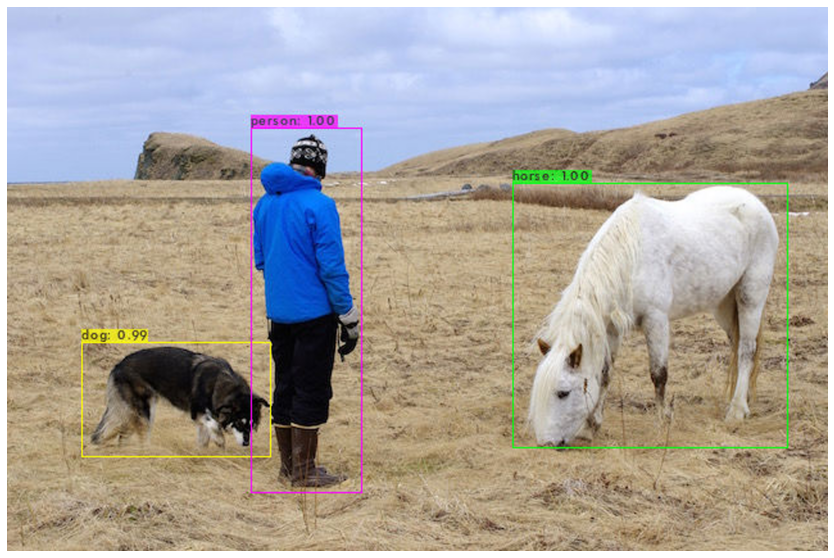

In [27]:
imShow('predictions.jpg')

In [28]:
ls

3rdparty/               data/                   predictions.jpg
backup/                 data_for_colab/         README.md
build/                  data_for_colab.zip      results/
build.ps1*              image_yolov3.sh*        scripts/
cfg/                    image_yolov4.sh*        src/
cmake/                  include/                test.txt
CMakeLists.txt          json_mjpeg_streams.sh*  train.txt
darknet*                LICENSE                 vcpkg.json
DarknetConfig.cmake.in  Makefile                video_yolov3.sh*
darknet_images.py       net_cam_v3.sh*          video_yolov4.sh*
darknet.py              net_cam_v4.sh*          yolov3.weights
darknet_video.py        obj/


In [ ]:
!./darknet detector train data_for_colab/obj.data data_for_colab/yolov3-tiny-obj.cfg data_for_colab/yolov3-tiny.conv.15 -dont_show -mjpeg_port 8090 -map


In [30]:
ls

3rdparty/                  darknet_video.py        predictions.jpg
backup/                    data/                   README.md
build/                     data_for_colab/         results/
build.ps1*                 data_for_colab.zip      scripts/
cfg/                       image_yolov3.sh*        src/
chart.png                  image_yolov4.sh*        test.txt
chart_yolov3-tiny-obj.png  include/                train.txt
cmake/                     json_mjpeg_streams.sh*  vcpkg.json
CMakeLists.txt             LICENSE                 video_yolov3.sh*
darknet*                   Makefile                video_yolov4.sh*
DarknetConfig.cmake.in     net_cam_v3.sh*          yolov3.weights
darknet_images.py          net_cam_v4.sh*
darknet.py                 obj/


In [31]:
from google.colab import files
uploaded = files.upload() 
for name, data in uploaded.items():
  with open(name, 'wb') as f:
    f.write(data)
    print ('saved file', name)

Saving test.jpg to test.jpg
saved file test.jpg


In [41]:
!./darknet detector test data_for_colab/obj.data data_for_colab/yolov3-tiny-obj.cfg backup/yolov3-tiny-obj_last.weights test.jpg -i 0 -thresh 0.5

 CUDA-version: 10020 (11020), GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 2, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 x  26 x 128 0.000 BF
   8 conv    256       3 x 3/ 1     26 x  26 x 128 ->   26

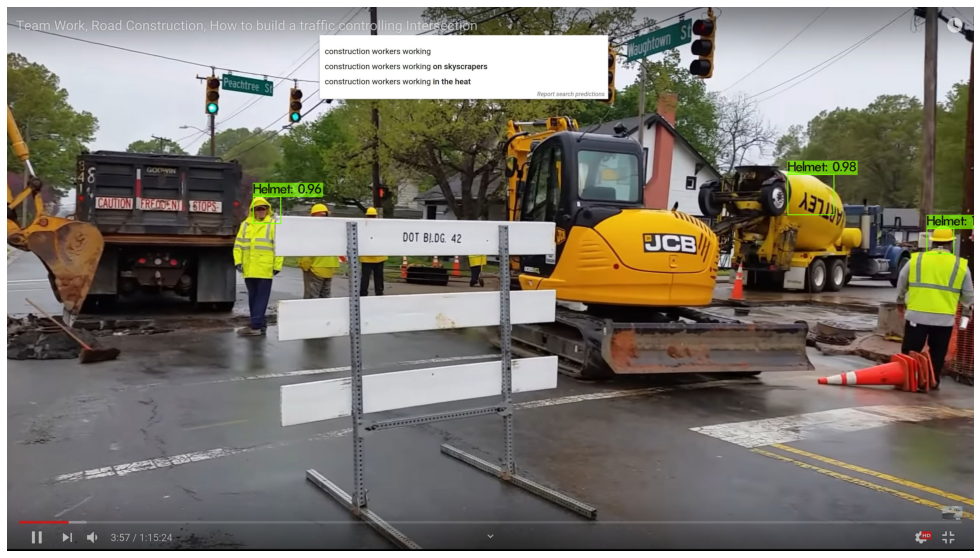

In [42]:
imShow('predictions.jpg')


In [34]:
cd ..

/content


In [35]:
cp drive/'My Drive'/helmet/bike1.mp4 /content/darknet

cp: cannot stat 'drive/My Drive/helmet/bike1.mp4': No such file or directory


In [36]:
cd darknet

/content/darknet


In [37]:
ls

3rdparty/                  darknet.py              obj/
backup/                    darknet_video.py        predictions.jpg
bad.list                   data/                   README.md
build/                     data_for_colab/         results/
build.ps1*                 data_for_colab.zip      scripts/
cfg/                       image_yolov3.sh*        src/
chart.png                  image_yolov4.sh*        test.jpg
chart_yolov3-tiny-obj.png  include/                test.txt
cmake/                     json_mjpeg_streams.sh*  train.txt
CMakeLists.txt             LICENSE                 vcpkg.json
darknet*                   Makefile                video_yolov3.sh*
DarknetConfig.cmake.in     net_cam_v3.sh*          video_yolov4.sh*
darknet_images.py          net_cam_v4.sh*          yolov3.weights


In [38]:
!./darknet detector demo data_for_colab/obj.data data_for_colab/yolov3-tiny-obj.cfg backup/yolov3-tiny-obj_1000.weights  -dont_show bike1.mp4 -i 0 -out_filename veout.avi

 CUDA-version: 10020 (11020), GPU count: 1  
 OpenCV version: 3.2.0
Demo
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 2, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 x  26 x 128 0.000 BF
   8 conv    256       3 x 3/ 1     26 x  26 x 128 ->

In [39]:
download('veout.avi') 

FileNotFoundError: ignored

In [ ]:
!./darknet detector calc_anchors Dataset/obj.data -num_of_clusters 5 -width 416 -height 416